In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process.kernels import Matern
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
msa_vmt = pd.read_csv('../../../results/historical_VMT_msa_basedon2022.csv',index_col=None) 
msa_vmt = msa_vmt.set_index('Year')
msa_vmt = msa_vmt[::-1]
msa_vmt

# Define new column names
new_column_names = ['New Haven (billion miles)', 'Hartford (billion miles)', 'Bridgeport (billion miles)']

# Assign new column names to the DataFrame
msa_vmt.columns = new_column_names

msa_vmt.index.name = 'year'


#msa_vmt.index = pd.to_datetime(msa_vmt.index, format='%Y')
msa_vmt.index.freq = 'AS'
df=msa_vmt
df

,New Haven (billion miles),Hartford (billion miles),Bridgeport (billion miles)
year,,,
1966,3.180747,4.817869,3.284243
1967,3.265089,4.945621,3.371328
1968,3.480136,5.271353,3.593373
1969,3.658838,5.542031,3.777889
1970,3.831482,5.803535,3.956151
1971,3.988981,6.042099,4.118775
1972,4.146481,6.280663,4.281399
1973,4.291865,6.500876,4.431514
1974,4.194942,6.354068,4.331438


In [4]:
NHM_data = df['New Haven (billion miles)']
y_NHM =NHM_data.values.reshape(-1, 1)
x_NHM = NHM_data.index.to_numpy().reshape(-1, 1)

x_NHM_df = pd.DataFrame(x_NHM, columns=['Year'])

# Now you can use iloc for indexing
split_index_x = round(len(x_NHM_df) * 0.9)
X_train = x_NHM_df.iloc[:split_index_x].copy()
X_test = x_NHM_df.iloc[split_index_x:].copy()

y_NHM_df = pd.DataFrame(y_NHM, columns=['New Haven (billion miles)'])

# Now you can use iloc for indexing
split_index_y = round(len(y_NHM_df) * 0.9)
Y_train = y_NHM_df.iloc[:split_index_y].copy()
Y_test = y_NHM_df.iloc[split_index_y:].copy()


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


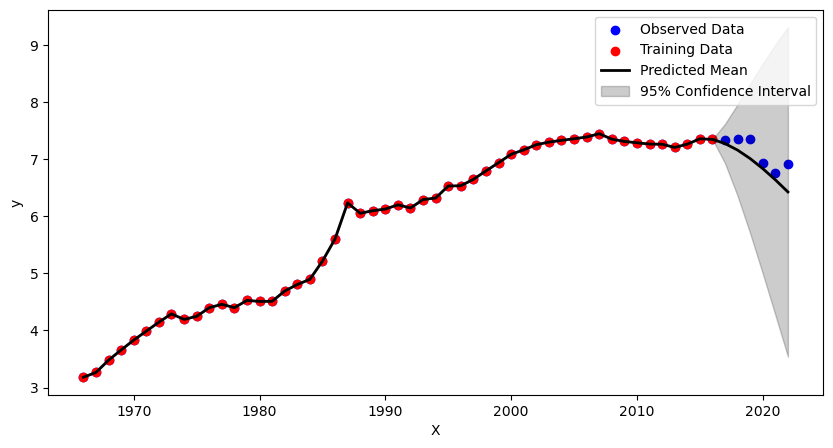

In [5]:
# Define the kernel (RBF kernel)
#kernel = 3.0 * RBF(length_scale=1.0)
kernel = 4.0 * Matern(length_scale=1.0)

 
# Create a Gaussian Process Regressor with the defined kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
 
# Fit the Gaussian Process model to the training data
gp.fit(X_train, Y_train)
 
# Make predictions on the test data
y_pred, sigma = gp.predict(X_test, return_std=True)
 
# Visualize the results

y_mean, y_cov = gp.predict(x_NHM, return_cov=True)
 
plt.figure(figsize=(10, 5))
plt.scatter(x_NHM, y_NHM, c='b', label='Observed Data')
plt.scatter(X_train, Y_train, c='r', label='Training Data')
plt.plot(x_NHM, y_mean, 'k', lw=2, zorder=9, label='Predicted Mean')
plt.fill_between(x_NHM[:, 0], y_mean - 1.96 * np.sqrt(np.diag(y_cov)), y_mean + 1.96 *
                 np.sqrt(np.diag(y_cov)), alpha=0.2, color='k', label='95% Confidence Interval')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [6]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(Y_test, y_pred)

# Ensure Y_test and y_pred have the same length
if len(Y_test) != len(y_pred):
    print("Error: Length of Y_test and y_pred does not match!")
else:
    # Calculate MAPE
    def mean_absolute_percentage_error(y_true, y_pred): 
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    mape = mean_absolute_percentage_error(np.ravel(Y_test), y_pred)

    print("RMSE:", rmse)
    print("MAE:", mae)
    print("MAPE:", mape)

RMSE: 0.2650906873111771
MAE: 0.2173554289476979
MAPE: 3.0605629403396337


In [7]:
#compute the performance metrics using different kernels

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, WhiteKernel, ConstantKernel, DotProduct

# Define a list of kernels to compare
kernels = [
    RBF(length_scale=1.0),
    Matern(length_scale=1.0),
    RationalQuadratic(length_scale=1.0, alpha=1.0),
    ExpSineSquared(length_scale=1.0, periodicity=1.0),
    RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1),  # RBF with added White Kernel
    ConstantKernel(constant_value=1.0),
    DotProduct(sigma_0=1.0)
    # Add more kernels if needed
]

# Define a list of scalar values to multiply with each kernel
scalars = [1.0, 2.0, 3.0]  # You can adjust the scalar values as needed

# Initialize variables to store the best kernel, scalar, and corresponding error metrics
best_kernel = None
best_scalar = None
best_rmse = float('inf')
best_mae = float('inf')
best_mape = float('inf')

# Iterate through each combination of kernel and scalar value
for kernel in kernels:
    for scalar in scalars:
        # Create a kernel scaled by the scalar value
        scaled_kernel = kernel * scalar
        
        # Create a Gaussian Process Regressor with the scaled kernel
        gp = GaussianProcessRegressor(kernel=scaled_kernel, n_restarts_optimizer=10)
        
        # Fit the Gaussian Process model to the training data
        gp.fit(x_NHM_df, y_NHM_df)
        
        # Make predictions on the test data
        y_pred = gp.predict(x_NHM_df)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_NHM_df, y_pred))
        
        # Calculate MAE
        mae = mean_absolute_error(y_NHM_df, y_pred)
        
        # Calculate MAPE
        def mean_absolute_percentage_error(y_true, y_pred): 
            return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        mape = mean_absolute_percentage_error(np.ravel(y_NHM_df), y_pred)
        
        # Check if current combination is better than the previous best
        if rmse < best_rmse:
            best_rmse = rmse
            best_mae = mae
            best_mape = mape
            best_kernel = kernel
            best_scalar = scalar

# Print the best kernel, scalar, and their corresponding error metrics
print("Best Kernel:", best_kernel)
print("Best Scalar:", best_scalar)
print("Best RMSE:", best_rmse)
print("Best MAE:", best_mae)
print("Best MAPE:", best_mape)


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod

Best Kernel: RBF(length_scale=1)
Best Scalar: 1.0
Best RMSE: 1.6340046113650916e-11
Best MAE: 1.5924688468478626e-11
Best MAPE: 2.6700243263610765e-10


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


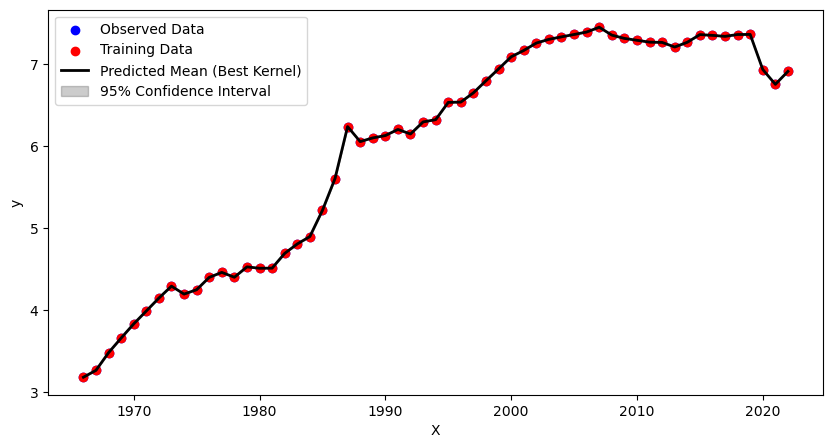

In [16]:
# Train a Gaussian Process Regressor with the best kernel
gp_best = GaussianProcessRegressor(kernel=best_kernel * best_scalar, n_restarts_optimizer=10)
gp_best.fit(x_NHM_df, y_NHM_df)

# Make predictions on the entire dataset
y_mean_best, y_cov_best = gp_best.predict(x_NHM, return_cov=True)

# Plot the observed data, training data, and predicted mean
plt.figure(figsize=(10, 5))
plt.scatter(x_NHM, y_NHM, c='b', label='Observed Data')
plt.scatter(x_NHM_df, y_NHM_df, c='r', label='Training Data')
plt.plot(x_NHM, y_mean_best, 'k', lw=2, zorder=9, label='Predicted Mean (Best Kernel)')
plt.fill_between(x_NHM[:, 0], y_mean_best - 1.96 * np.sqrt(np.diag(y_cov_best)),
                 y_mean_best + 1.96 * np.sqrt(np.diag(y_cov_best)), alpha=0.2, color='k', label='95% Confidence Interval')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


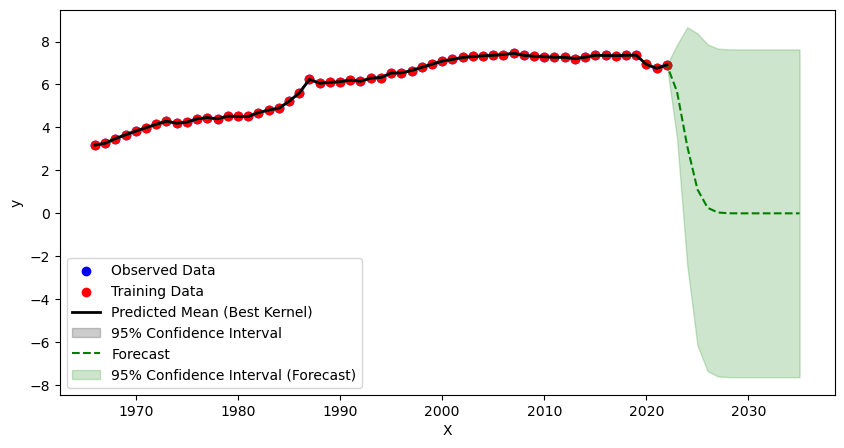

In [17]:
# Define the number of years to forecast
num_years_forecast = 13

# Extend the range of x_NHM to cover the forecast period
x_forecast = np.arange(x_NHM.min(), x_NHM.max() + num_years_forecast + 1).reshape(-1, 1)

# Make predictions for the forecast period
y_mean_forecast, y_cov_forecast = gp_best.predict(x_forecast, return_cov=True)

# Plot the observed data, training data, predicted mean, and forecast
plt.figure(figsize=(10, 5))
plt.scatter(x_NHM, y_NHM, c='b', label='Observed Data')
plt.scatter(x_NHM_df, y_NHM_df, c='r', label='Training Data')
plt.plot(x_NHM, y_mean_best, 'k', lw=2, zorder=9, label='Predicted Mean (Best Kernel)')
plt.fill_between(x_NHM[:, 0], y_mean_best - 1.96 * np.sqrt(np.diag(y_cov_best)),
                 y_mean_best + 1.96 * np.sqrt(np.diag(y_cov_best)), alpha=0.2, color='k', label='95% Confidence Interval')
plt.plot(x_forecast, y_mean_forecast, '--', color='green', label='Forecast')
plt.fill_between(x_forecast[:, 0], y_mean_forecast - 1.96 * np.sqrt(np.diag(y_cov_forecast)),
                 y_mean_forecast + 1.96 * np.sqrt(np.diag(y_cov_forecast)), alpha=0.2, color='green', label='95% Confidence Interval (Forecast)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [11]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, WhiteKernel, ConstantKernel, DotProduct
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define a list of kernels to compare
kernels = [
    RBF(length_scale=1.0),
    Matern(length_scale=1.0),
    RationalQuadratic(length_scale=1.0, alpha=1.0),
    ExpSineSquared(length_scale=1.0, periodicity=1.0),
    RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1),  # RBF with added White Kernel
    ConstantKernel(constant_value=1.0),
    DotProduct(sigma_0=1.0)
    # Add more kernels if needed
]

# Define a list of scalar values to multiply with each kernel
scalars = [1.0, 2.0, 3.0]  # You can adjust the scalar values as needed

# Initialize variables to store the best kernel, scalar, and corresponding error metrics
best_kernel = None
best_scalar = None
best_rmse = float('inf')
best_mae = float('inf')
best_mape = float('inf')

# Iterate through each combination of kernel and scalar value
for kernel1 in kernels:
    for kernel2 in kernels:
        # Sum two kernels together
        combined_kernel = kernel1 + kernel2
        
        for scalar in scalars:
            # Create a kernel scaled by the scalar value
            scaled_kernel = combined_kernel * scalar
            
            # Create a Gaussian Process Regressor with the scaled kernel
            gp = GaussianProcessRegressor(kernel=scaled_kernel, n_restarts_optimizer=10)
            
            # Fit the Gaussian Process model to the training data
            gp.fit(X_train, Y_train)
            
            # Make predictions on the test data
            y_pred = gp.predict(X_test)
            
            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
            
            # Calculate MAE
            mae = mean_absolute_error(Y_test, y_pred)
            
            # Calculate MAPE
            def mean_absolute_percentage_error(y_true, y_pred): 
                return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
            mape = mean_absolute_percentage_error(np.ravel(Y_test), y_pred)
            
            # Check if current combination is better than the previous best
            if rmse < best_rmse:
                best_rmse = rmse
                best_mae = mae
                best_mape = mape
                best_kernel = combined_kernel
                best_scalar = scalar

# Print the best kernel, scalar, and their corresponding error metrics
print("Best Kernel:", best_kernel)
print("Best Scalar:", best_scalar)
print("Best RMSE:", best_rmse)
print("Best MAE:", best_mae)
print("Best MAPE:", best_mape)


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter)

Best Kernel: RBF(length_scale=1) + WhiteKernel(noise_level=0.1) + DotProduct(sigma_0=1)
Best Scalar: 2.0
Best RMSE: 0.1326399349790344
Best MAE: 0.11658678577017678
Best MAPE: 1.6676008446041723


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


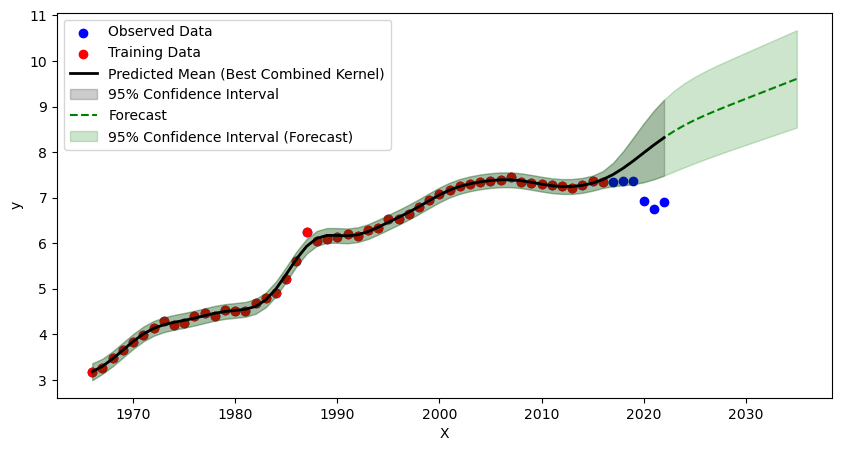

In [12]:
import matplotlib.pyplot as plt

# Train a Gaussian Process Regressor with the best combined kernel
gp_best_combined = GaussianProcessRegressor(kernel=best_kernel * best_scalar, n_restarts_optimizer=10)
gp_best_combined.fit(X_train, Y_train)

# Make predictions for the entire dataset using the best combined kernel
y_mean_combined, y_cov_combined = gp_best_combined.predict(x_NHM, return_cov=True)

# Define the number of years to forecast
num_years_forecast = 13

# Extend the range of x_NHM to cover the forecast period
x_forecast = np.arange(x_NHM.min(), x_NHM.max() + num_years_forecast + 1).reshape(-1, 1)

# Make predictions for the forecast period using the best combined kernel
y_mean_forecast_combined, y_cov_forecast_combined = gp_best_combined.predict(x_forecast, return_cov=True)

# Plot the observed data, training data, predicted mean with the best combined kernel, and forecast
plt.figure(figsize=(10, 5))
plt.scatter(x_NHM, y_NHM, c='b', label='Observed Data')
plt.scatter(X_train, Y_train, c='r', label='Training Data')
plt.plot(x_NHM, y_mean_combined, 'k', lw=2, zorder=9, label='Predicted Mean (Best Combined Kernel)')
plt.fill_between(x_NHM[:, 0], y_mean_combined - 1.96 * np.sqrt(np.diag(y_cov_combined)),
                 y_mean_combined + 1.96 * np.sqrt(np.diag(y_cov_combined)), alpha=0.2, color='k', label='95% Confidence Interval')
plt.plot(x_forecast, y_mean_forecast_combined, '--', color='green', label='Forecast')
plt.fill_between(x_forecast[:, 0], y_mean_forecast_combined - 1.96 * np.sqrt(np.diag(y_cov_forecast_combined)),
                 y_mean_forecast_combined + 1.96 * np.sqrt(np.diag(y_cov_forecast_combined)), alpha=0.2, color='green', label='95% Confidence Interval (Forecast)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'kernel': [RBF(), Matern()],
    'alpha': [1e-2, 1e-3, 1e-4],  # Regularization parameter
}

# Define the scoring metric
scoring = 'neg_mean_squared_error'  # Using negative MSE for optimization

# Instantiate the Gaussian Process Regressor
gp = GaussianProcessRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=gp, param_grid=param_grid, scoring=scoring, cv=5)

# Perform Grid Search Cross-Validation
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
best_model = GaussianProcessRegressor(kernel=best_params['kernel'], alpha=best_params['alpha'])
best_model.fit(X_train, Y_train)

# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Best MSE:", mse)


Best Hyperparameters: {'alpha': 0.01, 'kernel': Matern(length_scale=1, nu=1.5)}
Best MSE: 0.05302870617100618


In [14]:
grid_search

GridSearchCV(cv=5, estimator=GaussianProcessRegressor(),
             param_grid={'alpha': [0.01, 0.001, 0.0001],
                         'kernel': [RBF(length_scale=1),
                                    Matern(length_scale=1, nu=1.5)]},
             scoring='neg_mean_squared_error')